In [1]:
n = 10

df = pd.DataFrame({'p':np.random.randint(low=0,high=5,size=n*24)})

In [2]:
df.index = pd.DatetimeIndex(pd.date_range(start='10-01-2016 00:00',periods=n*24,freq='H'))

In [3]:
df['accum_p'] = df.p.cumsum()

In [4]:
df['day'] = df.index.strftime('%Y-%m-%d')

In [5]:
df2 = df.groupby(by='day').mean()

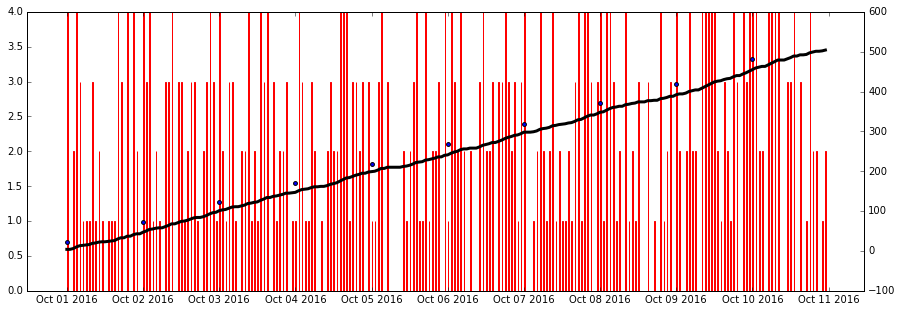

In [6]:
plt.figure(figsize=(15,5))
plt.bar(df.index,df.p,width=0.01,edgecolor='r')
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(df.index,df.accum_p,'-k',lw=3)
ax2.scatter(df2.index,df2.accum_p,s=15,c='b')

In [7]:
accum_p = df2.accum_p.as_matrix()

In [8]:
ext_p = accum_p[1:]-accum_p[0:-1]

In [9]:
df2['ext_p'] = np.NaN

In [10]:
df2.ext_p[1:] = ext_p

In [11]:
df2.reset_index(inplace=True)

In [12]:
df2.index = pd.DatetimeIndex(df2.day)

In [13]:
df3 = df.groupby('day').sum()

In [14]:
df3.index = pd.DatetimeIndex(df3.index)

<Container object of 10 artists>

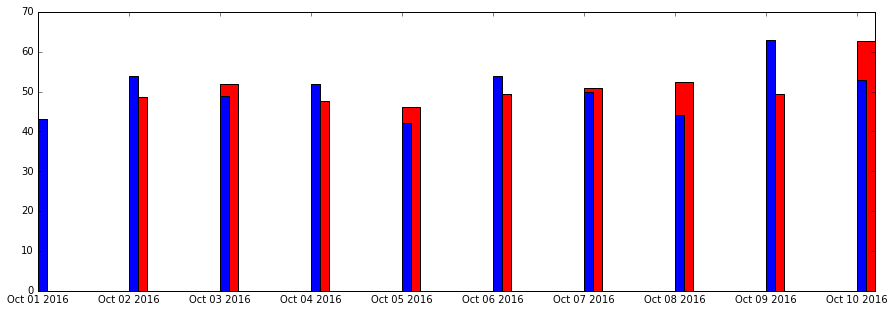

In [15]:
plt.figure(figsize=(15,5))
plt.bar(df2.index,df2.ext_p,width=0.2,facecolor='r')
plt.bar(df3.index,df3.p,width=0.1)

In [16]:
error = df3.p.as_matrix() - df2.ext_p.as_matrix()

In [17]:
np.nanmean(np.abs(error))/df2.ext_p.mean()

0.1178286129266521

In [18]:
np.nanmean(np.abs(error))

6.0092592592592569